In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [4]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [6]:
x = np.arange(10)
y = 2*x+1

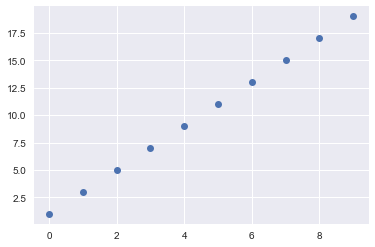

In [7]:
plt.plot(x,y,"o")

In [8]:
X = x.reshape(-1,1)
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [13]:
model.residues_

AttributeError: 'LinearRegression' object has no attribute 'residues_'

In [15]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
result = knn.predict([[3,5,4,2]])
print(iris.target_names[result])

['versicolor']


In [17]:
knn.predict_proba([[3,5,4,2]])

array([[ 0. ,  0.8,  0.2]])

SVC EXAMPLE

In [32]:
from sklearn.svm import SVC
svc = SVC(probability=True)
model = svc.fit(X,y)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
result = svc.predict([[3,5,4,2]])
print(iris.target_names[result])

['virginica']


In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [35]:
svc.predict_proba([[3,5,4,2]])

array([[ 0.21624259,  0.30033318,  0.48342423]])

REGRESSION EXAMPLE

In [41]:
np.random.seed(0)

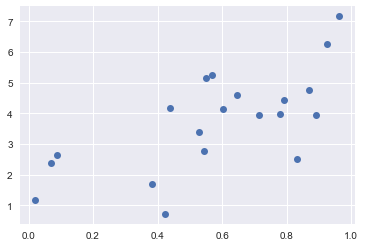

In [42]:
X = np.random.random(size=(20,1))
y = X.ravel()*3+2+np.random.randn(20)
plt.plot(X, y, "o")

In [43]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

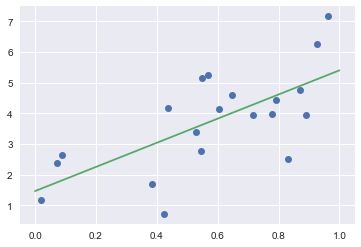

In [68]:
X_fit = np.linspace(0,1,100).reshape(-1,1)
y_fit = model.predict(X_fit)

plt.plot(X.ravel(), y, "o")
plt.plot(X_fit.ravel(), y_fit)

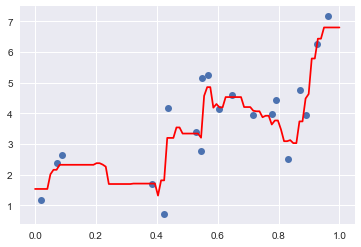

In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

X_fit = np.linspace(0,1,100).reshape(-1,1)
y_fit = model.predict(X_fit)

plt.plot(X.ravel(),y,"o")
plt.plot(X_fit, y_fit, c="red")

In [70]:
RandomForestRegressor?

Unsupervised Learning 

Dimensionality Reduction

Reduced dataset shape: (150, 2)
['setosa' 'versicolor' 'virginica']
Meaning of the 2 components:
 0.362 x sepal length (cm)+ -0.082 x sepal width (cm)+ 0.857 x petal length (cm)+ 0.359 x petal width (cm)
 0.657 x sepal length (cm)+ 0.730 x sepal width (cm)+ -0.176 x petal length (cm)+ -0.075 x petal width (cm)


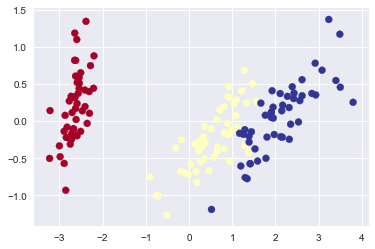

In [79]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap="RdYlBu")

print(iris.target_names)
print("Meaning of the 2 components:")
for components in pca.components_:
    print("+".join(" %.3f x %s" %(value, name) for value, name in 
                   zip(components, iris.feature_names)))

Clustering K-Means

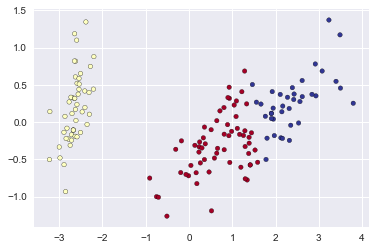

In [85]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred, 
           cmap="RdYlBu", edgecolors="k", lw=.3,s=20)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

y_pred = model.predict(X)
print(np.all(y==y_pred))

True


In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [97]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y)
model.fit(X_train,  Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))

[[10  0  0]
 [ 0 13  2]
 [ 0  0 13]]


In [151]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape


(1797, 64)

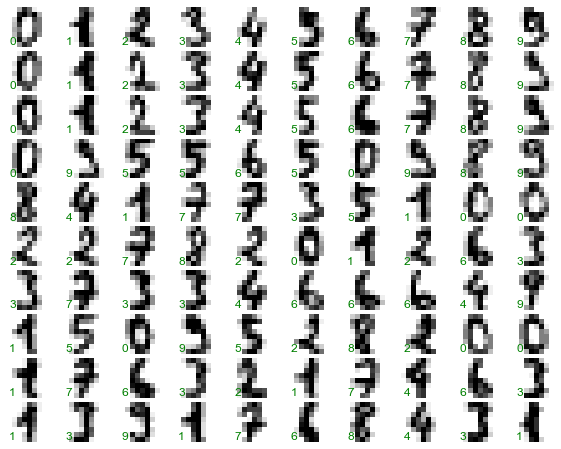

In [159]:
fig, axes = plt.subplots(10,10, figsize=(10,8))
fig.subplots_adjust(hspace=.1, wspace=.1)

for i , ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(.05, 
            .05, str(digits.target[i]), 
           transform=ax.transAxes, color="green")
    ax.set_xticks([])
    ax.set_yticks([])

In [128]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

(1797, 2)

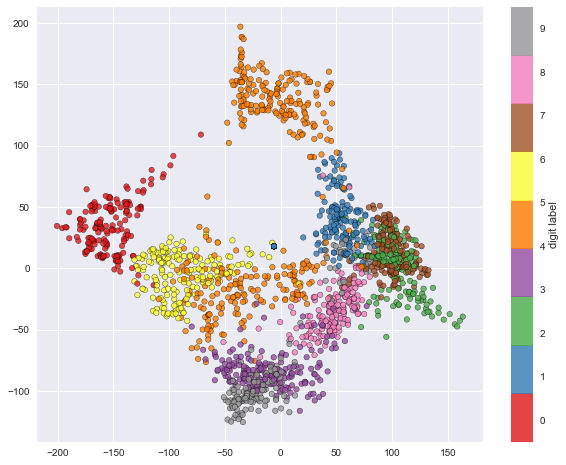

In [129]:
plt.subplots(figsize=(10,8))

plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
           edgecolor="k", alpha=.8, cmap="Set1", s=30, lw=.4)
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-.5, 9.5)

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target,
                                                   random_state=2)
print(X_train.shape, X_test.shape)

(1347, 64) (450, 64)


In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2")
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, y_pred),2)

0.94999999999999996

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  2,  0,  3,  1,  0],
       [ 0,  2,  0,  0, 36,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  2, 34]], dtype=int64)

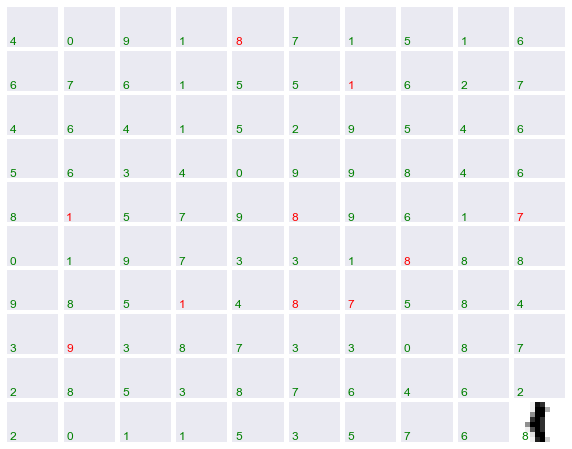

In [162]:
fig, axes = plt.subplots(10,10,figsize=(10,8))
plt.subplots_adjust(hspace=.1, wspace=.1)

for i, ax in enumerate(axes.flatten()):
    plt.imshow(digits.images[i], interpolation="nearest",cmap="binary")
    plt.text(.05, .05, str(y_pred[i]),
             transform=ax.transAxes,
            color="green" if (Y_test[i] == y_pred[i]) else "red")
    ax.set_xticks([])
    ax.set_yticks([])